# MDS Cities

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Interactive magics - comment out if running from another script
%matplotlib inline
%qtconsole

In [9]:
print(__doc__)
import numpy as np

from matplotlib import pyplot as plt

from sklearn import manifold
from sklearn.metrics import euclidean_distances

import scipy.io
import pandas as pd

Automatically created module for IPython interactive environment


## Carga de datos de ciudades y Preparacion a Matriz de Distancias

In [10]:
# carga de una matriz de matlab
mat = scipy.io.loadmat('cities.mat')

In [11]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 22 00:56:39 2015',
 '__version__': '1.0',
 '__globals__': [],
 'cities': array([[   0,  587, 1212,  701, 1936,  604,  748, 2139, 2182,  543],
        [ 587,    0,  920,  940, 1745, 1188,  713, 1858, 1737,  597],
        [1212,  920,    0,  879,  831, 1726, 1631,  949, 1021, 1494],
        [ 701,  940,  879,    0, 1374,  968, 1420, 1645, 1891, 1220],
        [1936, 1745,  831, 1374,    0, 2339, 2451,  347,  959, 2300],
        [ 604, 1188, 1726,  968, 2339,    0, 1092, 2594, 2734,  923],
        [ 748,  713, 1631, 1420, 2451, 1092,    0, 2571, 2408,  205],
        [2139, 1858,  949, 1645,  347, 2594, 2571,    0,  678, 2442],
        [2182, 1737, 1021, 1891,  959, 2734, 2408,  678,    0, 2329],
        [ 543,  597, 1494, 1220, 2300,  923,  205, 2442, 2329,    0]],
       dtype=uint16)}

In [12]:
# conversion a data frame que utilizaremos
cities = pd.DataFrame(mat['cities'])

In [13]:
cities.shape

(10, 10)

In [14]:
cities

,0,1,2,3,4,5,6,7,8,9
0,0,587,1212,701,1936,604,748,2139,2182,543
1,587,0,920,940,1745,1188,713,1858,1737,597
2,1212,920,0,879,831,1726,1631,949,1021,1494
3,701,940,879,0,1374,968,1420,1645,1891,1220
4,1936,1745,831,1374,0,2339,2451,347,959,2300
5,604,1188,1726,968,2339,0,1092,2594,2734,923
6,748,713,1631,1420,2451,1092,0,2571,2408,205
7,2139,1858,949,1645,347,2594,2571,0,678,2442
8,2182,1737,1021,1891,959,2734,2408,678,0,2329
9,543,597,1494,1220,2300,923,205,2442,2329,0


## Aplicando MDS

Aplicamos MDS con sklearn sobre la matriz de distancias obtenida.

In [17]:
# indicamos que queremos dos componentes
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(cities).embedding_
pos

array([[  413.63089982,   603.66040103],
       [  512.06869845,    23.20704023],
       [ -326.41177236,  -355.05933436],
       [ -284.68039336,   522.26891715],
       [-1128.10952878,  -567.94634875],
       [  405.1598456 ,  1205.5268851 ],
       [ 1127.47418166,   381.74836338],
       [-1090.92662937,  -915.21486368],
       [ -561.53377357, -1345.04051903],
       [  933.3284719 ,   446.84945893]])

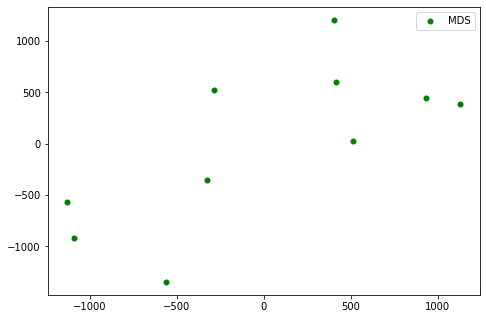

In [18]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(pos[:, 0], pos[:, 1], color='green', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

plt.show()

A aplicar el algotirmo obtenemos la siguente representacion en el plano. con un poco de trabajo y mas informacion del set de datos prodriamos discernir cual de cada una de las ciudades es cada una.

Tener en cuenta que las coordenadas que nos devuelve MDS pueden estar espejadas y rotadas respecto de la realidad, ya que las distances en todos los casos son las mismas, pero nos facilita el analisis de las mismas.

In [19]:
# indicamos que queremos tres componentes
mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(cities).embedding_
pos

array([[ -693.60399642,   166.05552541,   166.0836193 ],
       [ -162.01899488,   318.36146242,   368.01559524],
       [  426.9383533 ,  -200.99910014,  -112.74369028],
       [ -424.96887422,  -264.67240692,  -320.84962594],
       [  852.071634  ,  -646.93472769,  -670.83249128],
       [-1266.89408851,   107.70417297,   -12.04595993],
       [ -671.06860841,   698.89360808,   690.92055958],
       [ 1175.80315811,  -571.15958216,  -564.29847947],
       [ 1445.78238048,  -155.33804589,   -96.49902906],
       [ -682.04096345,   548.08909391,   552.24950184]])

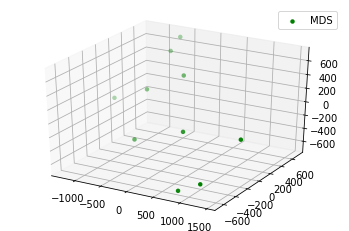

In [20]:
from mpl_toolkits import mplot3d

fig = plt.figure(1)
ax = plt.axes(projection='3d')

ax.scatter3D(pos[:, 0], pos[:, 1], pos[:, 2], color='green', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

plt.show()